ChatGPT said:

Hierarchical clustering is a method of unsupervised machine learning that builds a hierarchy (tree structure) of clusters instead of just a fixed number like K-Means. It’s often visualized with a dendrogram, which shows how data points or clusters are merged or split step by step.

Types of Hierarchical Clustering

Agglomerative (bottom-up)

Start with each data point as its own cluster.

At each step, merge the two closest clusters.

Continue until all points are in one big cluster.

Most common approach.

Divisive (top-down)

Start with all points in one cluster.

Recursively split clusters into smaller ones.

Less commonly used due to higher computational cost.

**Imported all the requuired libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Process of Agglomerative Hierarchical Clustering

Start: Treat each data point as an individual cluster.

Calculate distances: Use a distance metric (e.g., Euclidean, Manhattan) to measure how close clusters are.

Linkage method: Decide how to measure the distance between clusters:

Single linkage: minimum distance between two points across clusters.

Complete linkage: maximum distance.

Average linkage: average distance.

Ward’s method: minimizes variance within clusters.

Merge clusters: Combine the two closest clusters.

Repeat: Recompute distances and merge until only one cluster remains.

Dendrogram: Plot the tree to visualize merging. By “cutting” the dendrogram at a certain height, you can choose the number of clusters.

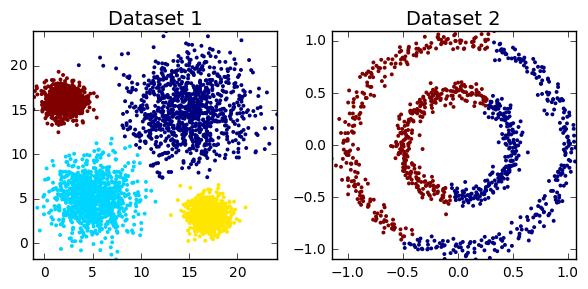

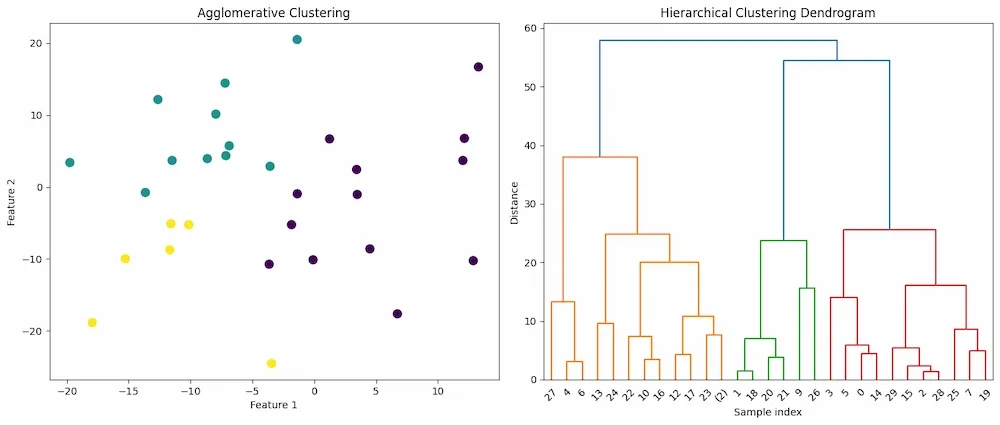

Load data

In [ ]:
df=pd.read_csv("/content/Country-data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Basic info

In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.isna().sum() #Data set doesn't contain any null values into it

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [ ]:
#compute high child mortality rate by country

high_cm=df.groupby("country")["child_mort"].max().sort_values(ascending=False)
print("High child mortality rate by country are ")
print(f"{high_cm.head()}")

High child mortality rate by country are 
country
Haiti                       208.0
Sierra Leone                160.0
Chad                        150.0
Central African Republic    149.0
Mali                        137.0
Name: child_mort, dtype: float64


In [ ]:
#compute Top exports by country

top_ex=df.groupby("country")["exports"].max().sort_values(ascending=False)
print("Top exports by country")
print(f"{top_ex.head()}")

Top exports by country
country
Singapore     200.0
Luxembourg    175.0
Malta         153.0
Ireland       103.0
Seychelles     93.8
Name: exports, dtype: float64


**Data Preprocessing**

dropping country column as of now its not necessory

In [ ]:
featured_df=df.copy()
featured_df=featured_df.drop("country",axis=1)
featured_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Scaling feature important because values like GDP and mortality are on very different scales

In [ ]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
scaled=scale.fit_transform(featured_df)
scaled_df=pd.DataFrame(scaled,columns=featured_df.columns)
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
#Check correlations (e.g., GDP vs. life expectancy).
co_rel=scaled_df["gdpp"].corr(scaled_df["life_expec"])
print(f"Correlations (e.g., GDP vs. life expectancy) is : {co_rel}")

Correlations (e.g., GDP vs. life expectancy) is : 0.6000891345742053


Pair plot for the data scaled_df

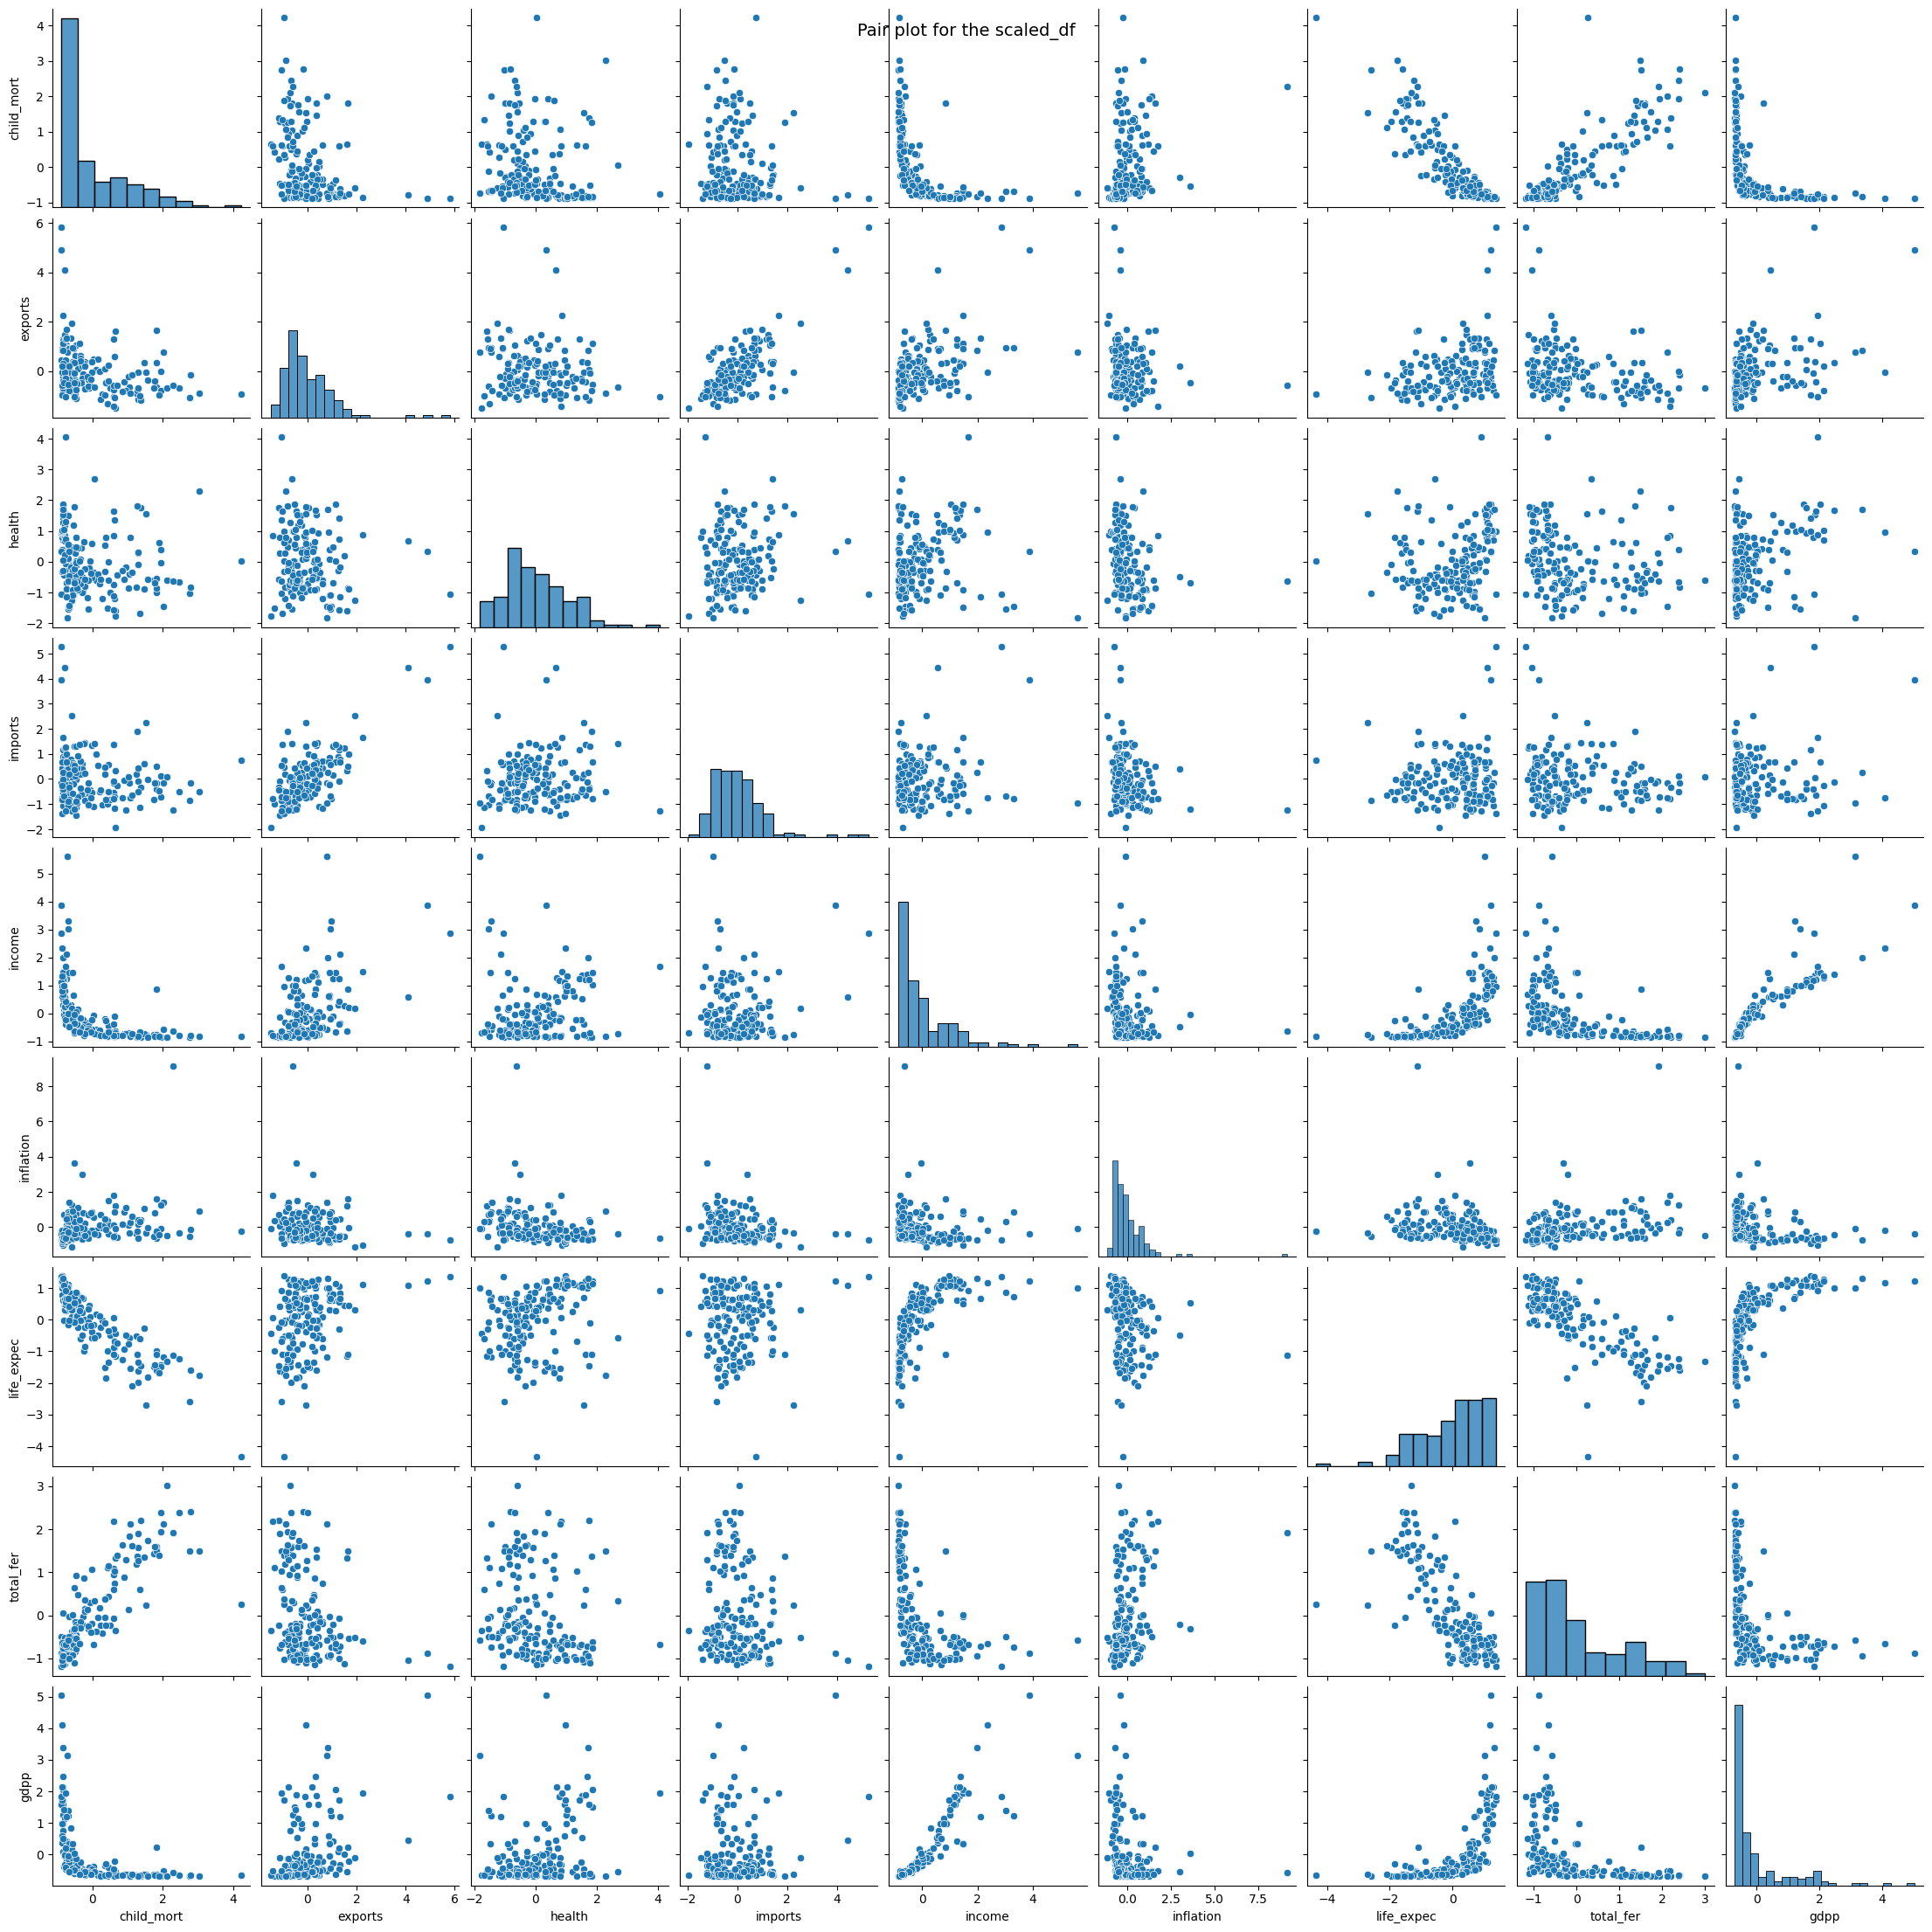

In [ ]:
sns.pairplot(data=scaled_df)
plt.suptitle("Pair plot for the scaled_df",fontsize=14)
plt.show()

Hierarchical clustering

from 'scipy' we immported linkage and dendrogram for hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
#Perform hierarchical clustering
# The 'linkage' function computes the hierarchical clustering from the
# scaled data.
# - The 'ward' method minimizes the variance of the clusters being merged.
# - The 'euclidean' metric is used to measure the distance between data points.

linked=linkage(scaled_df,method="ward",metric="euclidean")

Ploting dendrogram chart for clustering

 Visualize the results with a dendrogram
A dendrogram is a tree-like diagram that shows the sequence of merges or splits of clusters. It helps in determining the optimal number of clusters.

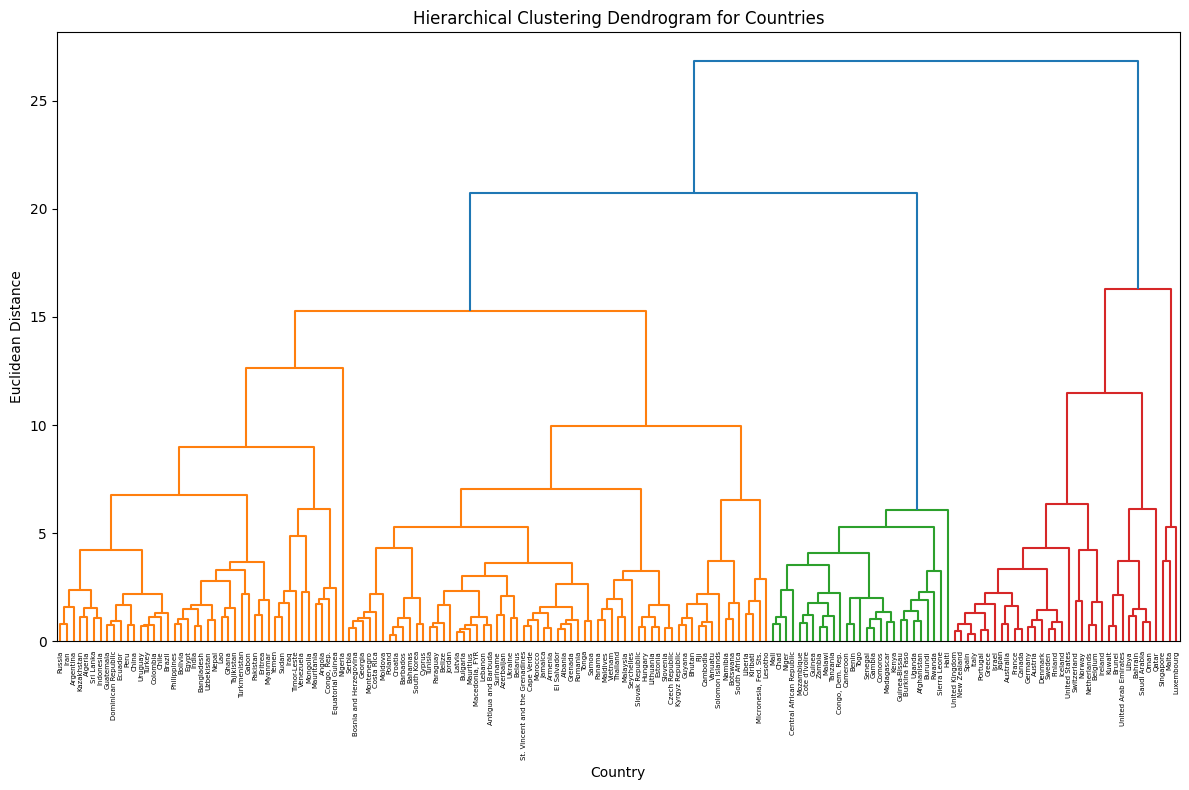

In [ ]:
plt.figure(figsize=(12,8))
dendrogram(linked,orientation="top",distance_sort="descending",labels=df["country"].to_list(),show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram for Countries')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

Importing clustering method used in the "Hierarchical clustering" called "AgglomerativeClustering"

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
scaled_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
x=scaled_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']]

clustering model calling

In [ ]:
model=AgglomerativeClustering()
clusters=model.fit_predict(x)

In [ ]:
print("Clusters :",model.labels_)

Clusters : [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [ ]:
scaled_df["clusters"]=clusters

In [ ]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


In [ ]:
scaled_df["clusters"].value_counts()

,count
clusters,
0,133
1,34
